In [1]:
import os
import numpy as np
import pandas as pd

from pandas import ExcelWriter
from pandas import ExcelFile

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
import matplotlib.dates as mdates

In [2]:
file_dir = os.path.join('/Users/digisha/Downloads/Fatigue_project/data')
file_name = os.path.join(file_dir, 'Sample_Data.xlsx')
df = pd.read_excel(file_name, sheetname='Sheet1')
df.head()

/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,subject_id,question_id,answer,timestamp
0,6,1600,5,06-22-2018 22:18:46
1,6,1601,3,06-22-2018 22:18:55
2,6,1602,3,06-22-2018 22:19:02
3,6,1603,4,06-22-2018 22:19:26
4,6,1600,6,06-22-2018 23:44:43


In [3]:
#changing datatypes, time stamp in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
#only depression fatigue questionnare considererd
mask = (df['question_id'] >= 1600) & (df['question_id'] < 1700)
df_16 = df.loc[mask].reset_index(drop=True)
df_16['time'] = [t.time() for t in df_16['timestamp']]
#df_16['time'] = df_16['time'].apply(lambda x: x.strftime('%H:%M:%S'))
df_16['answer']=df_16.answer.astype('int64')
df_16.head()

,subject_id,question_id,answer,timestamp,time
0,6,1600,5,2018-06-22 22:18:46,22:18:46
1,6,1601,3,2018-06-22 22:18:55,22:18:55
2,6,1602,3,2018-06-22 22:19:02,22:19:02
3,6,1603,4,2018-06-22 22:19:26,22:19:26
4,6,1600,6,2018-06-22 23:44:43,23:44:43


In [5]:
df_16['time'] = df_16['time'].apply(lambda x: x.strftime('%H:%M:%S'))

"""mask = (df_16['subject_id'] == 6)
df_16_6 = df_16.loc[mask].reset_index(drop=True)

mask = (df_16['subject_id'] == 27)
df_16_27 = df_16.loc[mask].reset_index(drop=True)"""

"mask = (df_16['subject_id'] == 6)\ndf_16_6 = df_16.loc[mask].reset_index(drop=True)\n\nmask = (df_16['subject_id'] == 27)\ndf_16_27 = df_16.loc[mask].reset_index(drop=True)"

In [6]:
#df_16[''] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_16['weekday'] = df_16['timestamp'].dt.dayofweek.map(dayOfWeek)
df_16.head(20)

,subject_id,question_id,answer,timestamp,time,weekday
0,6,1600,5,2018-06-22 22:18:46,22:18:46,Friday
1,6,1601,3,2018-06-22 22:18:55,22:18:55,Friday
2,6,1602,3,2018-06-22 22:19:02,22:19:02,Friday
3,6,1603,4,2018-06-22 22:19:26,22:19:26,Friday
4,6,1600,6,2018-06-22 23:44:43,23:44:43,Friday
5,6,1601,5,2018-06-22 23:44:59,23:44:59,Friday
6,6,1602,3,2018-06-22 23:45:07,23:45:07,Friday
7,6,1603,5,2018-06-22 23:45:20,23:45:20,Friday
8,6,1600,0,2018-06-23 06:08:06,06:08:06,Saturday
9,6,1601,5,2018-06-23 06:08:20,06:08:20,Saturday


In [7]:
df_16['weekend'] = 0
for i in range(len(df_16)):
    if df_16['weekday'][i] == 'Saturday' or df_16['weekday'][i] == 'Sunday':
        df_16['weekend'][i] = 1
    else:
        df_16['weekend'][i] = 0
df_16.head(20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,subject_id,question_id,answer,timestamp,time,weekday,weekend
0,6,1600,5,2018-06-22 22:18:46,22:18:46,Friday,0
1,6,1601,3,2018-06-22 22:18:55,22:18:55,Friday,0
2,6,1602,3,2018-06-22 22:19:02,22:19:02,Friday,0
3,6,1603,4,2018-06-22 22:19:26,22:19:26,Friday,0
4,6,1600,6,2018-06-22 23:44:43,23:44:43,Friday,0
5,6,1601,5,2018-06-22 23:44:59,23:44:59,Friday,0
6,6,1602,3,2018-06-22 23:45:07,23:45:07,Friday,0
7,6,1603,5,2018-06-22 23:45:20,23:45:20,Friday,0
8,6,1600,0,2018-06-23 06:08:06,06:08:06,Saturday,1
9,6,1601,5,2018-06-23 06:08:20,06:08:20,Saturday,1


In [8]:
datetime_object = datetime.strptime('00:00:00', '%H:%M:%S')
df_16['answer']=df_16.answer.astype('int64')
df_16['time'] = 0.00
for i in range(len(df_16)):
    df_16['time'][i] = (df_16['timestamp'][i] - datetime_object).seconds/(60*60)
    df_16['time'][i] = df_16['time'][i].round(2)
    
df_16.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,subject_id,question_id,answer,timestamp,time,weekday,weekend
0,6,1600,5,2018-06-22 22:18:46,22.31,Friday,0
1,6,1601,3,2018-06-22 22:18:55,22.32,Friday,0
2,6,1602,3,2018-06-22 22:19:02,22.32,Friday,0
3,6,1603,4,2018-06-22 22:19:26,22.32,Friday,0
4,6,1600,6,2018-06-22 23:44:43,23.75,Friday,0


In [9]:
mask = (df_16['question_id'] == 1600)
df_f = df_16.loc[mask].reset_index(drop=True)
df_f.head(7)

,subject_id,question_id,answer,timestamp,time,weekday,weekend
0,6,1600,5,2018-06-22 22:18:46,22.31,Friday,0
1,6,1600,6,2018-06-22 23:44:43,23.75,Friday,0
2,6,1600,0,2018-06-23 06:08:06,6.14,Saturday,1
3,6,1600,0,2018-06-23 10:30:13,10.50,Saturday,1
4,6,1600,2,2018-06-23 14:55:00,14.92,Saturday,1
5,6,1600,2,2018-06-23 19:26:19,19.44,Saturday,1
6,6,1600,2,2018-06-23 23:29:27,23.49,Saturday,1


In [10]:
df_f['day'] = 0.00
k = 0
patient = [6,27]
for pat in patient:
    count = 0
    for i in range(0,len(df_f)):
        if pat == df_f['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_f['day'][i] = 0
                #print('i',i)
                k = i
            else:
                df_f['day'][i] = (((df_f['timestamp'][i] - df_f['timestamp'][k]).days) + df_f['time'][i]/24)
            count += 1
df_f['day'] = df_f['day'].round(2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
mask = (df_f['weekend'] == 0)
df_weekday_f = df_f.loc[mask].reset_index(drop=True)
mask = (df_f['weekend'] == 1)
df_weekend_f = df_f.loc[mask].reset_index(drop=True)
df_weekend_f.head()

,subject_id,question_id,answer,timestamp,time,weekday,weekend,day
0,6,1600,0,2018-06-23 06:08:06,6.14,Saturday,1,0.26
1,6,1600,0,2018-06-23 10:30:13,10.50,Saturday,1,0.44
2,6,1600,2,2018-06-23 14:55:00,14.92,Saturday,1,0.62
3,6,1600,2,2018-06-23 19:26:19,19.44,Saturday,1,0.81
4,6,1600,2,2018-06-23 23:29:27,23.49,Saturday,1,1.98


In [ ]:
df_weekend_f.tail()

In [12]:
mask = (df_weekend_f['subject_id'] == 6)
df_weekend_f_6 = df_weekend_f[mask].reset_index(drop=True)

mask = (df_weekday_f['subject_id'] == 6)
df_weekday_f_6 = df_weekday_f[mask].reset_index(drop=True)

df_weekday_f_6.tail()

,subject_id,question_id,answer,timestamp,time,weekday,weekend,day
54,6,1600,5,2018-07-06 06:08:56,6.15,Friday,0,13.26
55,6,1600,6,2018-07-06 10:13:59,10.23,Friday,0,13.43
56,6,1600,6,2018-07-06 14:27:25,14.46,Friday,0,13.60
57,6,1600,7,2018-07-06 18:33:21,18.56,Friday,0,13.77
58,6,1600,6,2018-07-06 22:40:28,22.67,Friday,0,14.94


In [13]:
df_weekend_f_61 = df_weekend_f_6[(df_weekend_f_6['time'] >= 0) & (df_weekend_f_6['time'] < 6)]
df_weekend_f_62 = df_weekend_f_6[(df_weekend_f_6['time'] >= 6) & (df_weekend_f_6['time'] < 12)]
df_weekend_f_63 = df_weekend_f_6[(df_weekend_f_6['time'] >= 12) & (df_weekend_f_6['time'] < 18)]
df_weekend_f_64 = df_weekend_f_6[(df_weekend_f_6['time'] >= 18) & (df_weekend_f_6['time'] < 24)]

df_weekday_f_61 = df_weekday_f_6[(df_weekday_f_6['time'] >= 0) & (df_weekday_f_6['time'] < 6)]
df_weekday_f_62 = df_weekday_f_6[(df_weekday_f_6['time'] >= 6) & (df_weekday_f_6['time'] < 12)]
df_weekday_f_63 = df_weekday_f_6[(df_weekday_f_6['time'] >= 12) & (df_weekday_f_6['time'] < 18)]
df_weekday_f_64 = df_weekday_f_6[(df_weekday_f_6['time'] >= 18) & (df_weekday_f_6['time'] < 24)]

In [ ]:
#df_weekend_f_61

No handles with labels found to put in legend.


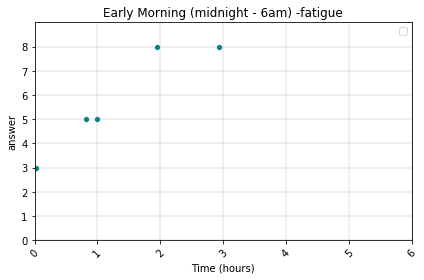

In [14]:
x = df_weekend_f_61['time']
plt.ylim(0, 9)
plt.xlim(0, 6)
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(0, 7, 1),rotation=45)
#plt.xticks(np.arange(0, max(x), 1),rotation=90)
plt.title('Early Morning (midnight - 6am) -fatigue')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'teal', data=df_weekend_f_61,  
             marker = 'o')
plt.xlabel('Time (hours)')
plt.tight_layout()
plt.legend(loc='upper right')

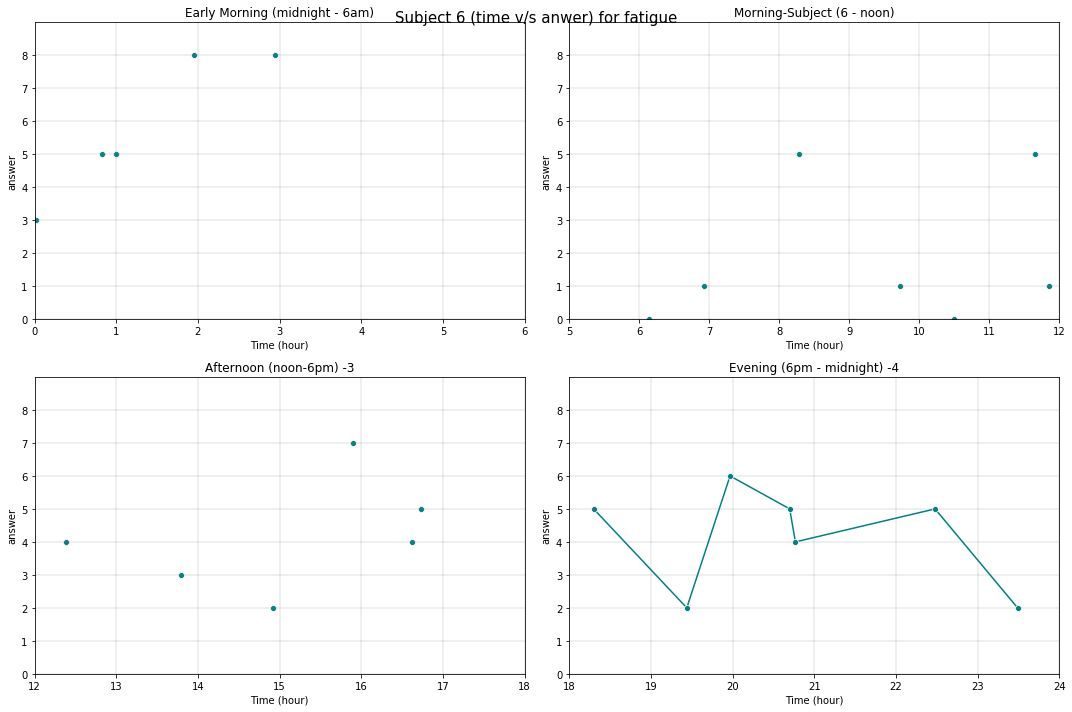

In [18]:
plt.figure(figsize = (15,10))
plt.suptitle('Subject 6 (time v/s anwer) for fatigue', fontsize=15)
plt.subplot(2, 2, 1)
plt.ylim(0, 9)
plt.xlim(0, 6)
plt.title('Early Morning (midnight - 6am)')
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(0, 7, 1))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'teal', data=df_weekend_f_61,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
plt.ylim(0, 9)
plt.xlim(6, 12)
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(5, 13, 1))
#plt.xticks(np.arange(18, 25, 1))
plt.title('Morning-Subject (6 - noon)')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'teal', data=df_weekend_f_62,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
plt.ylim(0, 9)
plt.xlim(12, 18)
#plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Afternoon (noon-6pm) -3')
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(12, 19, 1))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'teal', data=df_weekend_f_63,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
plt.ylim(0, 9)
plt.xlim(18, 24)
plt.title('Evening (6pm - midnight) -4')
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(18, 25, 1))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = 'time', y="answer", color = 'teal', data=df_weekend_f_64,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

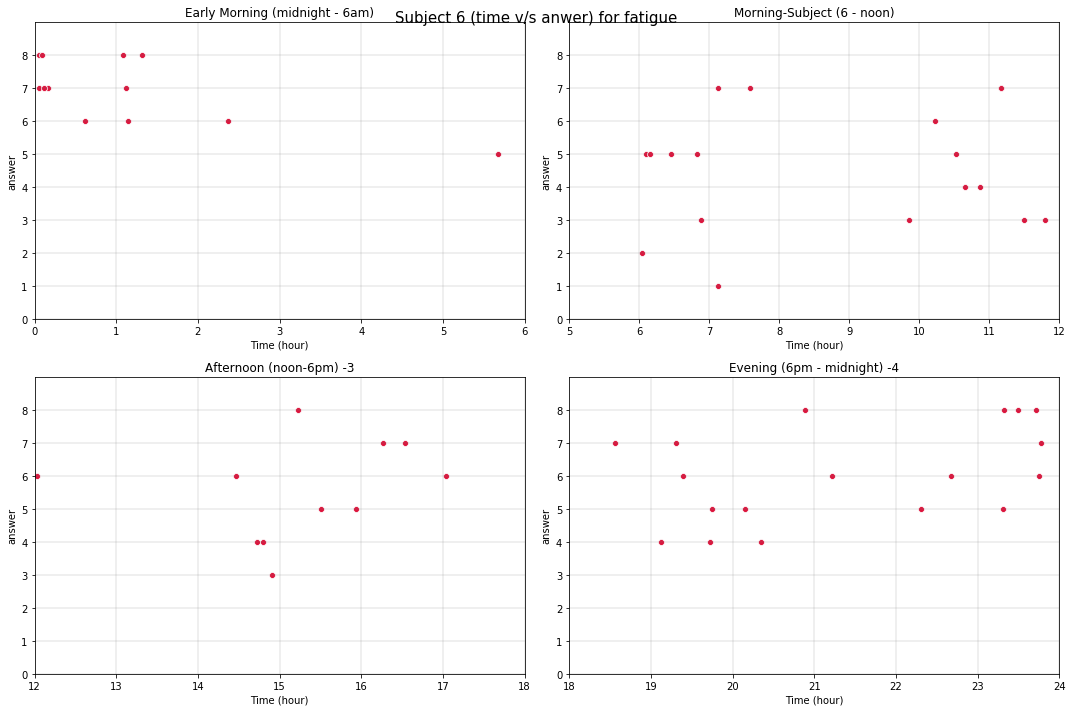

In [17]:
plt.figure(figsize = (15,10))
plt.suptitle('Subject 6 (time v/s anwer) for fatigue', fontsize=15)
plt.subplot(2, 2, 1)
plt.ylim(0, 9)
plt.xlim(0, 6)
plt.title('Early Morning (midnight - 6am)')
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(0, 7, 1))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'crimson', data=df_weekday_f_61,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
plt.ylim(0, 9)
plt.xlim(6, 12)
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(5, 13, 1))
#plt.xticks(np.arange(18, 25, 1))
plt.title('Morning-Subject (6 - noon)')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'crimson', data=df_weekday_f_62,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
plt.ylim(0, 9)
plt.xlim(12, 18)
#plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Afternoon (noon-6pm) -3')
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(12, 19, 1))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'crimson', data=df_weekday_f_63,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
plt.ylim(0, 9)
plt.xlim(18, 24)
plt.title('Evening (6pm - midnight) -4')
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(18, 25, 1))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'crimson', data=df_weekday_f_64,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
plt.suptitle('Subject 6 (time v/s anwer) for fatigue', fontsize=15)
plt.subplot(2, 2, 1)
plt.ylim(0, 9)
plt.xlim(0, 6)
plt.title('Early Morning (midnight - 6am)')
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(0, 7, 1))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'teal', data=df_weekend_f_61,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
plt.ylim(0, 9)
plt.xlim(6, 12)
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(5, 13, 1))
#plt.xticks(np.arange(18, 25, 1))
plt.title('Morning-Subject (6 - noon)')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'teal', data=df_weekend_f_62,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
plt.ylim(0, 9)
plt.xlim(12, 18)
#plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Afternoon (noon-6pm) -3')
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(12, 19, 1))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'teal', data=df_weekend_f_63,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
plt.ylim(0, 9)
plt.xlim(18, 24)
plt.title('Evening (6pm - midnight) -4')
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(18, 25, 1))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = 'time', y="answer", color = 'teal', data=df_weekend_f_64,  
             marker = 'o')
plt.xlabel('Time (hour)')
#plt.legend(loc='upper right')




plt.show()